# Import data

In [3]:
import pandas as pd
import re
import os
pd.set_option('display.max_columns', None)

In [4]:
data_path = os.path.join(os.path.expanduser('~'), "code", "jotanavarrete","goalguru", "data", "processed_data")
matches_cleaned = pd.read_csv(os.path.join(data_path, 'soccer_match', 'soccer_match-matches_processed.csv'))
#X_processed =  pd.read_csv('data/processed_data/soccer_match/soccer_match-X_processed.csv')
y_processed = pd.read_csv(os.path.join(data_path, 'soccer_match', 'soccer_match-y_processed.csv'))

In [5]:
features =['last_10_home_as_home_avg_pass_accu',
       'last_10_home_as_home_avg_shot_accu',
       'last_10_home_as_home_avg_total_passes',
       'last_10_home_as_home_avg_total_accu_passes',
       'last_10_home_as_home_avg_total_shots',
       'last_10_home_as_home_avg_total_accu_shots',
       'last_10_home_as_home_avg_total_goals',
       'last_10_home_as_home_avg_total_goals_in',
       'last_10_home_as_home_avg_matchranks',
       'last_10_home_as_home_total_wins', 'last_10_home_as_home_total_draws',
       'last_10_home_as_home_total_loses', 'last_10_home_as_home_win_ratio',
       'last_10_home_as_away_avg_pass_accu',
       'last_10_home_as_away_avg_shot_accu',
       'last_10_home_as_away_avg_total_passes',
       'last_10_home_as_away_avg_total_accu_passes',
       'last_10_home_as_away_avg_total_shots',
       'last_10_home_as_away_avg_total_accu_shots',
       'last_10_home_as_away_avg_total_goals',
       'last_10_home_as_away_avg_total_goals_in',
       'last_10_home_as_away_avg_matchranks',
       'last_10_home_as_away_total_wins', 'last_10_home_as_away_total_draws',
       'last_10_home_as_away_total_loses', 'last_10_home_as_away_win_ratio',
       'last_10_away_as_home_avg_pass_accu',
       'last_10_away_as_home_avg_shot_accu',
       'last_10_away_as_home_avg_total_passes',
       'last_10_away_as_home_avg_total_accu_passes',
       'last_10_away_as_home_avg_total_shots',
       'last_10_away_as_home_avg_total_accu_shots',
       'last_10_away_as_home_avg_total_goals',
       'last_10_away_as_home_avg_total_goals_in',
       'last_10_away_as_home_avg_matchranks',
       'last_10_away_as_home_total_wins', 'last_10_away_as_home_total_draws',
       'last_10_away_as_home_total_loses', 'last_10_away_as_home_win_ratio',
       'last_10_away_as_away_avg_pass_accu',
       'last_10_away_as_away_avg_shot_accu',
       'last_10_away_as_away_avg_total_passes',
       'last_10_away_as_away_avg_total_accu_passes',
       'last_10_away_as_away_avg_total_shots',
       'last_10_away_as_away_avg_total_accu_shots',
       'last_10_away_as_away_avg_total_goals',
       'last_10_away_as_away_avg_total_goals_in',
       'last_10_away_as_away_avg_matchranks',
       'last_10_away_as_away_total_wins', 'last_10_away_as_away_total_draws',
       'last_10_away_as_away_total_loses', 'last_10_away_as_away_win_ratio',
       'avgHomePassAccuLast10Games','avgHomeShotAccuLast10Games',
       'avgAwayPassAccuLast10Games','avgAwayShotAccuLast10Games',
       'homeWRlast10Games', 'awayWRlast10Games',
       'homeLast10AvgRank', 'awayLast10AvgRank'
       ]

In [6]:
matches_cleaned

,dateutc,competitionId,seasonId,gameweek,matchId,winner,homeId,awayId,totalHomePasses,accurateHomePasses,totalHomeShots,accurateHomeShots,totalAwayPasses,accurateAwayPasses,totalAwayShots,accurateAwayShots,homeTeam,awayTeam,homeTeam_matchRank,awayTeam_matchRank,homeScore,awayScore,homePassAccuracy,homeShotAccuracy,awayPassAccuracy,awayShotAccuracy,homeWins,last_10_home_as_home_avg_pass_accu,last_10_home_as_home_avg_shot_accu,last_10_home_as_home_avg_total_passes,last_10_home_as_home_avg_total_accu_passes,last_10_home_as_home_avg_total_shots,last_10_home_as_home_avg_total_accu_shots,last_10_home_as_home_avg_total_goals,last_10_home_as_home_avg_total_goals_in,last_10_home_as_home_avg_matchranks,last_10_home_as_home_total_wins,last_10_home_as_home_total_draws,last_10_home_as_home_total_loses,last_10_home_as_home_win_ratio,last_10_home_as_away_avg_pass_accu,last_10_home_as_away_avg_shot_accu,last_10_home_as_away_avg_total_passes,last_10_home_as_away_avg_total_accu_passes,last_10_home_as_away_avg_total_shots,last_10_home_as_away_avg_total_accu_shots,last_10_home_as_away_avg_total_goals,last_10_home_as_away_avg_total_goals_in,last_10_home_as_away_avg_matchranks,last_10_home_as_away_total_wins,last_10_home_as_away_total_draws,last_10_home_as_away_total_loses,last_10_home_as_away_win_ratio,last_10_away_as_home_avg_pass_accu,last_10_away_as_home_avg_shot_accu,last_10_away_as_home_avg_total_passes,last_10_away_as_home_avg_total_accu_passes,last_10_away_as_home_avg_total_shots,last_10_away_as_home_avg_total_accu_shots,last_10_away_as_home_avg_total_goals,last_10_away_as_home_avg_total_goals_in,last_10_away_as_home_avg_matchranks,last_10_away_as_home_total_wins,last_10_away_as_home_total_draws,last_10_away_as_home_total_loses,last_10_away_as_home_win_ratio,last_10_away_as_away_avg_pass_accu,last_10_away_as_away_avg_shot_accu,last_10_away_as_away_avg_total_passes,last_10_away_as_away_avg_total_accu_passes,last_10_away_as_away_avg_total_shots,last_10_away_as_away_avg_total_accu_shots,last_10_away_as_away_avg_total_goals,last_10_away_as_away_avg_total_goals_in,last_10_away_as_away_avg_matchranks,last_10_away_as_away_total_wins,last_10_away_as_away_total_draws,last_10_away_as_away_total_loses,last_10_away_as_away_win_ratio,avgHomePassAccuLast10Games,avgHomeShotAccuLast10Games,avgAwayPassAccuLast10Games,avgAwayShotAccuLast10Games,homeLast10AvgRank,awayLast10AvgRank,homeWRlast10Games,awayWRlast10Games
0,2018-07-15 15:00:00,28,10078,0,2058017,4418,4418,9598,241,186,7,5,517,429,14,3,France,Croatia,0.00829,0.00666,4,2,0.771784,0.714286,0.829787,0.214286,1,0.820100,0.406763,473.2,391.3,15.9,6.5,2.3,0.8,0.004547,9.0,5.0,4.0,0.500000,0.848208,0.392313,496.5,422.3,12.0,4.7,2.1,1.6,0.007775,10.0,4.0,3.0,0.588235,0.863542,0.383498,553.9,479.2,13.2,5.0,1.6,0.8,0.008313,10.0,5.0,3.0,0.555556,0.851297,0.388687,555.5,473.2,13.1,5.1,1.3,0.7,0.007738,8.0,7.0,3.0,0.444444,0.799875,0.460678,0.851845,0.345496,0.007720,0.004205,0.8,0.8
1,2018-07-14 14:00:00,28,10078,0,2058016,5629,5629,2413,484,427,11,4,654,593,14,5,Belgium,England,0.00740,0.00453,2,0,0.882231,0.363636,0.906728,0.357143,1,0.814927,0.373364,396.1,324.6,7.8,3.0,1.3,1.2,0.011381,6.0,4.0,8.0,0.333333,0.800308,0.311032,373.1,299.8,6.9,2.4,0.7,1.7,0.007785,5.0,2.0,10.0,0.294118,0.798901,0.431190,398.5,320.4,8.0,3.3,1.1,1.3,0.009884,6.0,6.0,6.0,0.333333,0.790499,0.311288,391.2,313.2,7.2,2.3,0.5,1.9,0.004768,2.0,4.0,10.0,0.125000,0.803771,0.318298,0.816299,0.323155,0.006008,0.009929,0.8,0.5
2,2018-07-11 18:00:00,28,10078,0,2058015,9598,9598,2413,595,470,22,7,448,370,10,1,Croatia,England,0.01583,0.00851,1,1,0.789916,0.318182,0.825893,0.100000,1,0.749505,0.455993,340.3,258.7,10.4,4.6,1.5,1.1,0.010972,6.0,5.0,7.0,0.333333,0.768252,0.282911,364.6,282.9,10.2,2.5,1.0,1.9,0.006855,3.0,2.0,10.0,0.200000,0.820100,0.406763,473.2,391.3,15.9,6.5,2.3,0.8,0.004547,9.0,5.0,4.0,0.500000,0.848594,0.393382,490.9,417.8,11.4,4.5,2.2,1.7,0.009903,10.0,3.0,3.0,0.625000,0.779446,0.469684,0.803438,0.465645,0.002913,0.010087,0.7

In [615]:
matches_cleaned[matches_cleaned['matchId'] == 2058017]#[features]

,dateutc,competitionId,seasonId,gameweek,matchId,winner,homeId,awayId,totalHomePasses,accurateHomePasses,totalHomeShots,accurateHomeShots,totalAwayPasses,accurateAwayPasses,totalAwayShots,accurateAwayShots,homeTeam,awayTeam,homeTeam_matchRank,awayTeam_matchRank,homeScore,awayScore,homePassAccuracy,homeShotAccuracy,awayPassAccuracy,awayShotAccuracy,homeWins,last_10_home_as_home_avg_pass_accu,last_10_home_as_home_avg_shot_accu,last_10_home_as_home_avg_total_passes,last_10_home_as_home_avg_total_accu_passes,last_10_home_as_home_avg_total_shots,last_10_home_as_home_avg_total_accu_shots,last_10_home_as_home_avg_total_goals,last_10_home_as_home_avg_total_goals_in,last_10_home_as_home_avg_matchranks,last_10_home_as_home_total_wins,last_10_home_as_home_total_draws,last_10_home_as_home_total_loses,last_10_home_as_home_win_ratio,last_10_home_as_away_avg_pass_accu,last_10_home_as_away_avg_shot_accu,last_10_home_as_away_avg_total_passes,last_10_home_as_away_avg_total_accu_passes,last_10_home_as_away_avg_total_shots,last_10_home_as_away_avg_total_accu_shots,last_10_home_as_away_avg_total_goals,last_10_home_as_away_avg_total_goals_in,last_10_home_as_away_avg_matchranks,last_10_home_as_away_total_wins,last_10_home_as_away_total_draws,last_10_home_as_away_total_loses,last_10_home_as_away_win_ratio,last_10_away_as_home_avg_pass_accu,last_10_away_as_home_avg_shot_accu,last_10_away_as_home_avg_total_passes,last_10_away_as_home_avg_total_accu_passes,last_10_away_as_home_avg_total_shots,last_10_away_as_home_avg_total_accu_shots,last_10_away_as_home_avg_total_goals,last_10_away_as_home_avg_total_goals_in,last_10_away_as_home_avg_matchranks,last_10_away_as_home_total_wins,last_10_away_as_home_total_draws,last_10_away_as_home_total_loses,last_10_away_as_home_win_ratio,last_10_away_as_away_avg_pass_accu,last_10_away_as_away_avg_shot_accu,last_10_away_as_away_avg_total_passes,last_10_away_as_away_avg_total_accu_passes,last_10_away_as_away_avg_total_shots,last_10_away_as_away_avg_total_accu_shots,last_10_away_as_away_avg_total_goals,last_10_away_as_away_avg_total_goals_in,last_10_away_as_away_avg_matchranks,last_10_away_as_away_total_wins,last_10_away_as_away_total_draws,last_10_away_as_away_total_loses,last_10_away_as_away_win_ratio,avgHomePassAccuLast10Games,avgHomeShotAccuLast10Games,avgAwayPassAccuLast10Games,avgAwayShotAccuLast10Games,homeLast10AvgRank,awayLast10AvgRank,homeWRlast10Games,awayWRlast10Games
0,2018-07-15 15:00:00,28,10078,0,2058017,4418,4418,9598,241,186,7,5,517,429,14,3,France,Croatia,0.00829,0.00666,4,2,0.771784,0.714286,0.829787,0.214286,1,0.8201,0.406763,473.2,391.3,15.9,6.5,2.3,0.8,0.004547,9.0,5.0,4.0,0.5,0.848208,0.392313,496.5,422.3,12.0,4.7,2.1,1.6,0.007775,10.0,4.0,3.0,0.588235,0.863542,0.383498,553.9,479.2,13.2,5.0,1.6,0.8,0.008313,10.0,5.0,3.0,0.555556,0.851297,0.388687,555.5,473.2,13.1,5.1,1.3,0.7,0.007738,8.0,7.0,3.0,0.444444,0.799875,0.460678,0.851845,0.345496,0.00772,0.004205,0.8,0.8


# Feature Engineering

In [276]:
def get_features(matches):
    def get_features_for_team(team: int,
                                   home: bool,
                                   as_home: bool,
                                   index):

        condition_draw = matches['homeWins'] == 0
        if home:
            team_str = 'home_'
        else:
            team_str = 'away_'
        if as_home:
            as_str = 'as_home_'
            condition_team = matches['homeId'] == team
            like = 'homeId'
            condition_win = matches['homeWins'] == 1
            condition_loses = matches['homeWins'] == -1
            pass_accuracy = 'homePassAccuracy'
            shot_accuracy = 'homeShotAccuracy'
            passes = 'totalHomePasses'
            accu_passes = 'accurateHomePasses'
            shots = 'totalHomeShots'
            accu_shots = 'accurateHomeShots'
            goals = 'homeScore'
            goals_in = 'awayScore'
            matchrank = 'homeTeam_matchRank'
            wins = 'homeWins'
            
        else:
            as_str = 'as_away_'
            condition_team = matches['awayId'] == team
            like = 'awayId'
            condition_win = matches['homeWins'] == -1
            condition_loses = matches['homeWins'] == 1
            pass_accuracy = 'awayPassAccuracy'
            shot_accuracy = 'awayShotAccuracy'
            passes = 'totalAwayPasses'
            accu_passes = 'accurateAwayPasses'
            shots = 'totalAwayShots'
            accu_shots = 'accurateAwayShots'
            goals = 'awayScore'
            goals_in = 'homeScore'
            matchrank = 'awayTeam_matchRank'
            wins = 'homeWins'

        #logic
        try:
            condition = (matches[(condition_team) & condition_date].head(10).shape[0] < 11) & (matches[condition_team & condition_date].head(10).shape[0] > 0)
            inputer = 0
        except:
            condition = True
            inputer = None
        if condition:
            try:
                matches.loc[index, f'last_10_{team_str}{as_str}avg_pass_accu'] = matches[(condition_team) & condition_date].head(10)[[like, pass_accuracy]].groupby(like).mean().loc[team,pass_accuracy]
            except:
                matches.loc[index, f'last_10_{team_str}{as_str}avg_pass_accu'] = inputer
            try:
                matches.loc[index, f'last_10_{team_str}{as_str}avg_shot_accu'] = matches[(condition_team) & condition_date].head(10)[[like, shot_accuracy]].groupby(like).mean().loc[team,shot_accuracy]
            except:
                matches.loc[index, f'last_10_{team_str}{as_str}avg_shot_accu'] = inputer
            try:
                matches.loc[index, f'last_10_{team_str}{as_str}total_passes'] = matches[(condition_team) & condition_date].head(10)[[like, passes]].groupby(like).sum().loc[team,passes]
            except:
                matches.loc[index, f'last_10_{team_str}{as_str}total_passes'] = inputer
            try:
                matches.loc[index, f'last_10_{team_str}{as_str}total_accu_passes'] = matches[(condition_team) & condition_date].head(10)[[like, accu_passes]].groupby(like).sum().loc[team,accu_passes]
            except:
                matches.loc[index, f'last_10_{team_str}{as_str}total_accu_passes'] = inputer
            try:
                matches.loc[index, f'last_10_{team_str}{as_str}total_shots'] = matches[(condition_team) & condition_date].head(10)[[like, shots]].groupby(like).sum().loc[team,shots]
            except:
                matches.loc[index, f'last_10_{team_str}{as_str}total_shots'] = inputer
            try:    
                matches.loc[index, f'last_10_{team_str}{as_str}total_accu_shots'] = matches[(condition_team) & condition_date].head(10)[[like, accu_shots]].groupby(like).sum().loc[team,accu_shots]
            except:
                matches.loc[index, f'last_10_{team_str}{as_str}total_accu_shots'] = inputer
            try:
                matches.loc[index, f'last_10_{team_str}{as_str}total_goals'] = matches[(condition_team) & condition_date].head(10)[[like, goals]].groupby(like).sum().loc[team,goals]
            except:
                matches.loc[index, f'last_10_{team_str}{as_str}total_goals'] = inputer
            try:
                matches.loc[index, f'last_10_{team_str}{as_str}total_goals_in'] = matches[(condition_team) & condition_date].head(10)[[like, goals_in]].groupby(like).sum().loc[team,goals_in]
            except:
                matches.loc[index, f'last_10_{team_str}{as_str}total_goals_in'] = inputer
            try:
                matches.loc[index, f'last_10_{team_str}{as_str}avg_matchranks'] = matches[(condition_team) & condition_date].head(10)[[like, matchrank]].groupby(like).mean().loc[team,matchrank]
            except:
                matches.loc[index, f'last_10_{team_str}{as_str}avg_matchranks'] = inputer
            try:
                matches.loc[index, f'last_10_{team_str}{as_str}total_wins'] = matches[condition_team & condition_date & condition_win].head(10)[[like, wins]].groupby(like).count().loc[team,wins]
            except:
                matches.loc[index, f'last_10_{team_str}{as_str}total_wins'] = inputer
            try:
                matches.loc[index, f'last_10_{team_str}{as_str}total_draws'] = matches[condition_team & condition_date & condition_draw].head(10)[[like, wins]].groupby(like).count().loc[team, wins]
            except:
                matches.loc[index, f'last_10_{team_str}{as_str}total_draws'] = inputer
            try:
                matches.loc[index, f'last_10_{team_str}{as_str}total_loses'] = matches[condition_team & condition_date & condition_loses].head(10)[[like, wins]].groupby(like).count().loc[team,wins]
            except:
                matches.loc[index, f'last_10_{team_str}{as_str}total_loses'] = inputer
            try:
                matches.loc[index, f'last_10_{team_str}{as_str}win_ratio'] = matches.loc[index, f'last_10_{team_str}{as_str}total_wins'] / (matches.loc[index, f'last_10_{team_str}{as_str}total_wins'] +/
                                                                                                                                        matches.loc[index, f'last_10_{team_str}{as_str}total_draws']+/
                                                                                                                                           matches.loc[index, f'last_10_{team_str}{as_str}total_loses'])
            except:
                matches.loc[index, f'last_10_{team_str}{as_str}win_ratio'] = inputer
            else:
                pass
        return matches
        
    for index,row in matches.iterrows():
        home_id = matches['homeId'].iloc[index]
        away_id = matches['awayId'].iloc[index]
        date = matches['dateutc'].iloc[index]
    
        condition_date = matches['dateutc']<date
        
        get_features_for_team(home_id, True, True, index)
        get_features_for_team(home_id, True, False, index)
        get_features_for_team(away_id, False, True, index)
        get_features_for_team(away_id, False, False, index)
    return matches
    

# Model training

### Defining variables

In [569]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow.keras.optimizers as opti
import numpy as np

In [610]:
y = y_processed['homeWins']

In [611]:
y.shape

(1687,)

In [612]:
y1 = pd.get_dummies(y,prefix = 'Class', dtype = int)

In [613]:
y1.shape

(1687, 3)

In [336]:
y.value_counts()

homeWins
 1    770
-1    499
 0    418
Name: count, dtype: int64

In [341]:
X = matches_cleaned[features]

In [342]:
X.shape

(1687, 60)

In [394]:
pd.DataFrame(X).corr()

,last_10_home_as_home_avg_pass_accu,last_10_home_as_home_avg_shot_accu,last_10_home_as_home_avg_total_passes,last_10_home_as_home_avg_total_accu_passes,last_10_home_as_home_avg_total_shots,last_10_home_as_home_avg_total_accu_shots,last_10_home_as_home_avg_total_goals,last_10_home_as_home_avg_total_goals_in,last_10_home_as_home_avg_matchranks,last_10_home_as_home_total_wins,last_10_home_as_home_total_draws,last_10_home_as_home_total_loses,last_10_home_as_home_win_ratio,last_10_home_as_away_avg_pass_accu,last_10_home_as_away_avg_shot_accu,last_10_home_as_away_avg_total_passes,last_10_home_as_away_avg_total_accu_passes,last_10_home_as_away_avg_total_shots,last_10_home_as_away_avg_total_accu_shots,last_10_home_as_away_avg_total_goals,last_10_home_as_away_avg_total_goals_in,last_10_home_as_away_avg_matchranks,last_10_home_as_away_total_wins,last_10_home_as_away_total_draws,last_10_home_as_away_total_loses,last_10_home_as_away_win_ratio,last_10_away_as_home_avg_pass_accu,last_10_away_as_home_avg_shot_accu,last_10_away_as_home_avg_total_passes,last_10_away_as_home_avg_total_accu_passes,last_10_away_as_home_avg_total_shots,last_10_away_as_home_avg_total_accu_shots,last_10_away_as_home_avg_total_goals,last_10_away_as_home_avg_total_goals_in,last_10_away_as_home_avg_matchranks,last_10_away_as_home_total_wins,last_10_away_as_home_total_draws,last_10_away_as_home_total_loses,last_10_away_as_home_win_ratio,last_10_away_as_away_avg_pass_accu,last_10_away_as_away_avg_shot_accu,last_10_away_as_away_avg_total_passes,last_10_away_as_away_avg_total_accu_passes,last_10_away_as_away_avg_total_shots,last_10_away_as_away_avg_total_accu_shots,last_10_away_as_away_avg_total_goals,last_10_away_as_away_avg_total_goals_in,last_10_away_as_away_avg_matchranks,last_10_away_as_away_total_wins,last_10_away_as_away_total_draws,last_10_away_as_away_total_loses,last_10_away_as_away_win_ratio,avgHomePassAccuLast10Games,avgHomeShotAccuLast10Games,avgAwayPassAccuLast10Games,avgAwayShotAccuLast10Games,homeWRlast10Games,awayWRlast10Games,homeLast10AvgRank,awayLast10AvgRank
last_10_home_as_home_avg_pass_accu,1.000000,0.287476,0.843794,0.872155,0.593033,0.621009,0.612644,-0.427831,0.033423,0.383682,-0.251893,-0.529049,0.627943,0.861231,0.274966,0.773660,0.793888,0.569118,0.583364,0.604958,-0.509919,-0.067546,0.397176,-0.037876,-0.560788,0.613053,0.012353,0.027476,0.021370,0.022937,-0.035851,-0.020309,0.046571,-0.006709,-0.063876,-0.078852,-0.120067,-0.087656,0.050125,0.060904,0.011100,0.067180,0.068456,0.028115,0.010811,0.031656,-0.035472,0.020820,-0.070244,-0.090834,-0.081024,0.033933,0.685959,-0.000320,-0.041180,0.019837,0.008398,-0.020912,0.020188,-0.032424
last_10_home_as_home_avg_shot_accu,0.287476,1.000000,0.403105,0.393269,0.125607,0.600808,0.647404,-0.348668,-0.076454,0.314959,-0.108811,-0.286227,0.503843,0.368156,0.302415,0.405792,0.406694,0.317965,0.342230,0.366508,-0.068238,0.046082,0.183302,0.069549,-0.250212,0.247947,0.007748,-0.027426,0.018791,0.019159,-0.006817,-0.017137,0.044090,-0.102068,-0.046116,0.017230,0.011653,-0.013591,0.058893,0.024547,0.039478,0.006576,0.011311,0.045440,0.046424,0.068056,-0.071716,0.009124,0.039376,0.011325,-0.034523,0.079679,0.136810,0.705011,-0.074019,-0.096633,-0.009651,0.001788,0.061161,-0.023107
last_10_home_as_home_avg_total_passes,0.843794,0.403105,1.000000,0.997390,0.644166,0.721129,0.655325,-0.550989,0.051769,0.528351,-0.186129,-0.477474,0.712267,0.761522,0.425824,0.869701,0.871950,0.651038,0.712213,0.678325,-0.516790,0.078917,0.572866,0.040161,-0.550535,0.685712,-0.005417,0.010111,-0.011438,-0.009986,-0.030443,-0.031253,-0.006215,-0.009314,-0.081920,0.019835,-0.028542,-0.001754,0.002156,0.020578,0.001963,0.033474,0.032341,0.019785,-0.010012,-0.000936,-0.030803,0.023589,0.016293,0.003033,-0.004917,0.008047,0.529317,0.099439,-0.081207,0.016964,-0.007317,0.010354,0.029651,-0.013437
last_10_home_as_home_avg_total_accu_passes,0.872155,0.393269,0.997390,1.000000,0.646903,0.720559,0.663612,-0.550308,0.057384,0.514149,-0.1994

<Axes: >

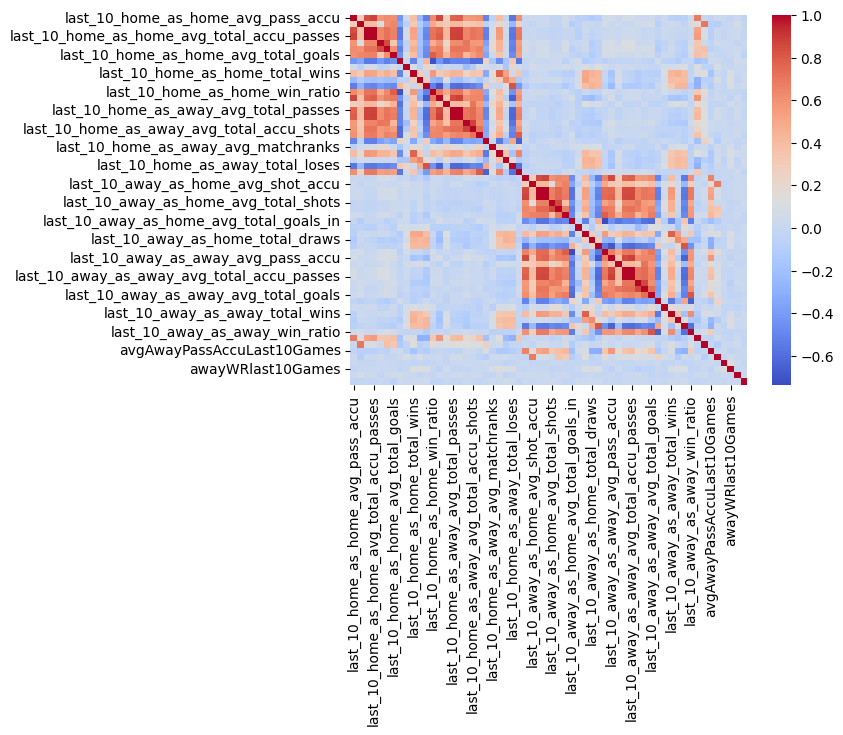

In [343]:
sns.heatmap(pd.DataFrame(X).corr(), cmap='coolwarm')

In [431]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [402]:
#scaler = RobustScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [403]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 30)
cols = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30']
reduced_x_train = pd.DataFrame(data = pca.fit_transform(X_train), columns = cols)
reduced_x_test = pd.DataFrame(data = pca.transform(X_test), columns = cols)
#scaler = RobustScaler()
#reduced_x_train = pd.DataFrame(scaler.fit_transform(reduced_x_train))
#reduced_x_test = pd.DataFrame(scaler.transform(reduced_x_test))

<Axes: >

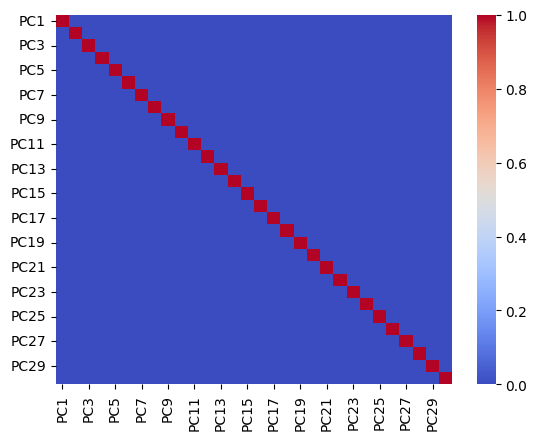

In [404]:
sns.heatmap(pd.DataFrame(reduced_x_train).corr(), cmap='coolwarm')

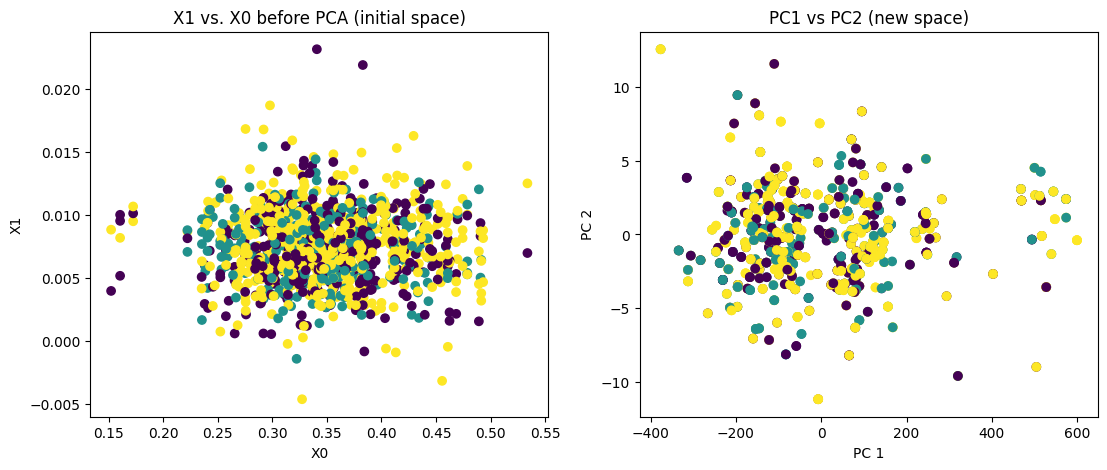

In [405]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('X1 vs. X0 before PCA (initial space)'); plt.xlabel('X0'); plt.ylabel('X1')
plt.scatter(X_train.iloc[:,53], X_train.iloc[:,59], c = y_train)

plt.subplot(1,2,2)
plt.title('PC1 vs PC2 (new space)'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.scatter(reduced_x_train.iloc[:,0], reduced_x_train.iloc[:,8], c = y_train);

In [432]:
y_train = pd.get_dummies(y_train,prefix = 'Class', dtype = int)
y_test = pd.get_dummies(y_test,prefix = 'Class', dtype = int)

In [541]:
def initialize_model():

    optimizer = opti.SGD(learning_rate=0.001)
    
    model = Sequential()
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(120, input_dim = 60, activation = 'relu'))
    model.add(layers.Dense(80, activation = 'relu'))
    model.add(layers.Dense(40, activation = 'relu'))
    model.add(layers.Dense(20, activation = 'relu'))
    model.add(layers.Dense(12, activation = 'relu'))
    model.add(layers.Dense(6, activation = 'relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(4, activation = 'relu'))
    #model.add(layers.Dropout(0.1))
    model.add(layers.Dense(3, activation = 'softmax'))

    model.compile(
        loss = 'categorical_crossentropy',
        optimizer = optimizer,
        metrics = 'accuracy'
    )

    return model

In [562]:
es = EarlyStopping(
        monitor="val_loss",
        patience=50,
        restore_best_weights=True
    )

model = initialize_model()
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.3,
    shuffle = True,
    epochs = 200,
    batch_size =  64,
    verbose = 0,
    callbacks = es
)

In [570]:
np.max(history.history['val_accuracy'])

0.4576271176338196

In [576]:
model.evaluate(X_test, y_test,
               batch_size = 64,
               verbose = 0,
              return_dict=True)

{'loss': 1.0612705945968628, 'accuracy': 0.5009862184524536}

In [603]:
X_new = pd.DataFrame(X_test.reset_index().drop(columns = ['index']).loc[100, :]).T

In [609]:
model.predict(X_new)[0]

1/1 [==============================] - 0s 31ms/step


array([0.32611743, 0.2793608 , 0.3945217 ], dtype=float32)